<a href="https://colab.research.google.com/github/girijeshcse/computervisionTFKeras/blob/main/object_detection/02%20opencv_selective_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the code zip file

In [5]:
!wget https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/opencv-selective-search/opencv-selective-search.zip
!unzip -qq opencv-selective-search.zip
%cd opencv-selective-search

--2021-08-28 02:37:56--  https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/opencv-selective-search/opencv-selective-search.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.236.184
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.236.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64208 (63K) [application/zip]
Saving to: ‘opencv-selective-search.zip’

opencv-selective-se 100%[===================>]  62.70K   364KB/s    in 0.2s    

2021-08-28 02:37:57 (364 KB/s) - ‘opencv-selective-search.zip’ saved [64208/64208]

/content/opencv-selective-search


## Blog Post Code

### Import Packages

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import random
import time
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Implementing Selective Search with OpenCV and Python

In [3]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to the input image")
#ap.add_argument("-m", "--method", type=str, default="fast",
#	choices=["fast", "quality"],
#	help="selective search method")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "dog.jpg",
	"method": "fast"
}

In [6]:
# load the input image
image = cv2.imread(args["image"])

# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# check to see if we are using the *fast* but *less accurate* version
# of selective search
if args["method"] == "fast":
	print("[INFO] using *fast* selective search")
	ss.switchToSelectiveSearchFast()

# otherwise we are using the *slower* but *more accurate* version
else:
	print("[INFO] using *quality* selective search")
	ss.switchToSelectiveSearchQuality()

[INFO] using *fast* selective search


In [7]:
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()

# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

[INFO] selective search took 3.4759 seconds
[INFO] 1219 total region proposals


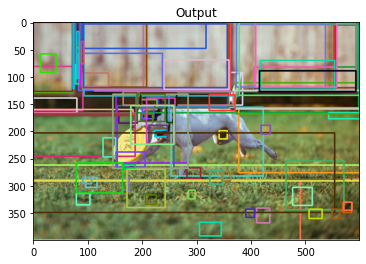

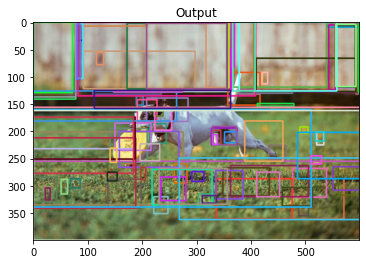

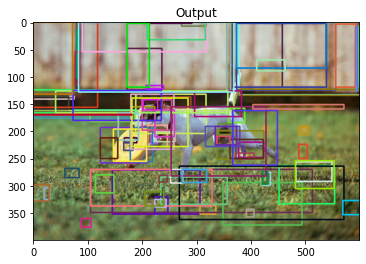

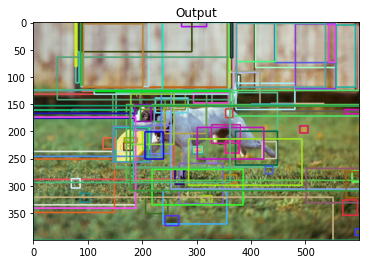

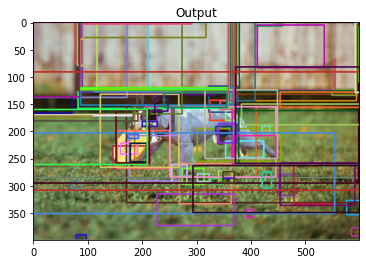

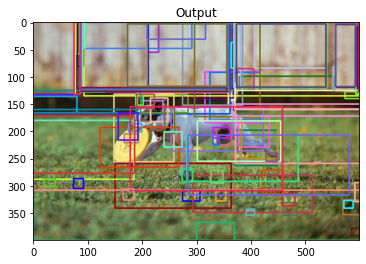

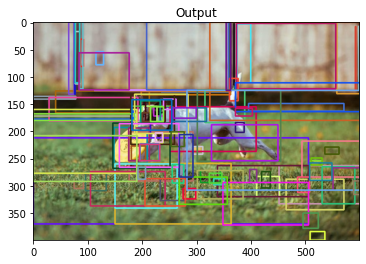

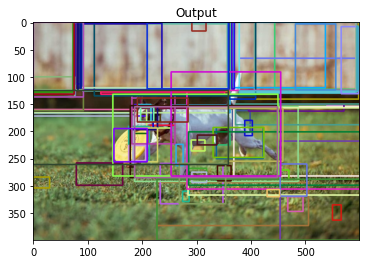

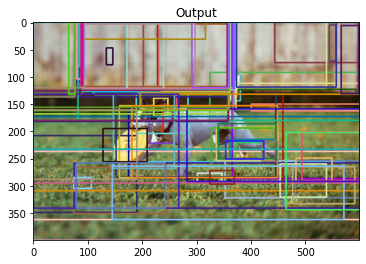

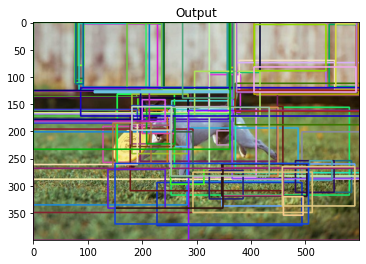

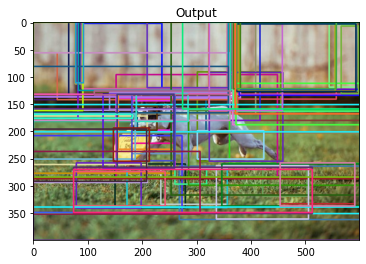

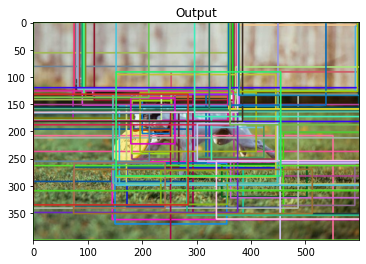

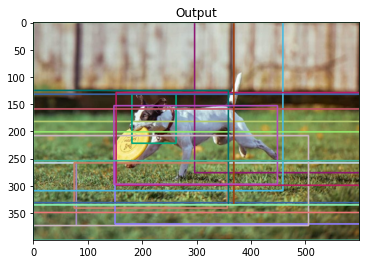

In [8]:
# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
	# clone the original image so we can draw on it
	output = image.copy()

	# loop over the current subset of region proposals
	for (x, y, w, h) in rects[i:i + 100]:
		# draw the region proposal bounding box on the image
		color = [random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)

	# show the output image
	plt_imshow("Output", output)